# Visualize MCIT Courses and dependencies

In [6]:
import pandas as pd
import numpy as np
import random
from graphviz import Digraph
class Policy:
    
    def __init__(self):
        """
        
        """        
        self.courseGraph = {
                    '591' : {'pre' : None, 'co' : None },
                    '592' : {'pre' : None, 'co' : None },
                    '593' : {'pre' : ['591'], 'co' : ['591'] },
                    '594' : {'pre' : ['591'], 'co' : None },
                    '595' : {'pre' : ['593'], 'co' : None },
                    '596' : {'pre' : ['592', '594'], 'co' : ['594'] },
                    '515' : {'pre' : None, 'co' : None },
                    '547' : {'pre' : ['592', '594', '595'], 'co' : None },
                    '549' : {'pre' : ['593', '595'], 'co' : None },
                    '550' : {'pre' : ['591', '592', '596'], 'co' : ['596'] },
                    '581' : {'pre' : ['591', '592', '593', '594'], 'co' : None },
                    '542' : {'pre' : ['592'], 'co' : None },
        }
                
    
    def showCourseGraph(self):
        """
        Visualizes the course graph to show dependencies
        """
        visualGraph = Digraph()
        nodeChar = 'A'
        dictCourseToNode = {}
        
        # initialize nodes
        for key in self.courseGraph:
            corequisites = self.courseGraph[key]['co']
            prerequisites = self.courseGraph[key]['pre']
            dictCourseToNode[key] = nodeChar
            if (corequisites is None):
                visualGraph.node(nodeChar, key)
            else:
                visualGraph.node(nodeChar, key + str(corequisites).replace("'",""))
            nodeChar = chr(ord(nodeChar) + 1)
        
        # build edges
        edges = []
        for key in self.courseGraph:
            if (self.courseGraph[key]['pre'] == None):
                continue
            else:
                prerequisites = self.courseGraph[key]['pre']
                for pre in prerequisites:
                    edges.append(dictCourseToNode[pre] + dictCourseToNode[key])
        
        visualGraph.edges(edges)
        return visualGraph
            

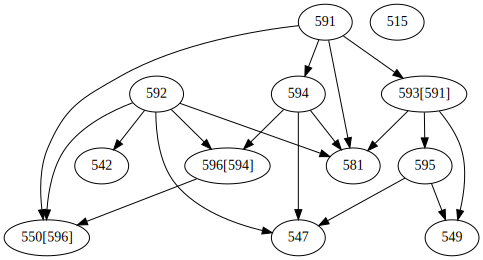

In [7]:
myGraph = Policy()
myGraph.showCourseGraph()